In [48]:
# Laden der Bibliotheken

# Datenmanipulation
import pandas as pd

# Datenvisualisierung
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
from core.data import load_competition_from_kaggle

In [49]:
# Dataset laden
competition_name = "DontGetKicked"  # Kaggle Competition Name
destination = "../data/raw"

files = load_competition_from_kaggle(
    competition_name=competition_name, 
    destination=destination,
    )

files

Destination directory '../data/raw\DontGetKicked' already exists with files. Skipping download (replace=False).


['Carvana_Data_Dictionary.txt',
 'example_entry.csv',
 'test.csv',
 'test.zip',
 'training.csv',
 'training.zip']

In [50]:
# Einblick in das Datenset
df_train = pd.read_csv("/".join(["../data/raw/", competition_name, files[4]]))
df_train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [51]:
# Dimensions, Beschreibung, Duplikate
display(
    "Shape",
    df_train.shape,
    "Description",
    df_train.describe().round(2).T,
    "Duplicates",
    df_train.duplicated().sum(),
)

# Datentypen, fehlende Werte, eindeutige Werte, Beispielwerte
pd.DataFrame(
    {
        "Data Types": df_train.dtypes,
        "Missing Values": df_train.isnull().sum(),
        "Unique Values": df_train.nunique(),
        "Sample Values": [df_train[col].sample(3).tolist() for col in df_train.columns]
    })

'Shape'

(72983, 34)

'Description'

,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.43,21077.24,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.12,0.33,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.34,1.73,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.18,1.71,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.49,0.52,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71500.00,14578.91,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.91,2461.99,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.64,2722.49,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.03,3156.29,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.93,3385.79,0.0,7493.0,9789.0,12088.0,41482.0


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
RefId,int64,0,72983,"[39265, 54070, 41194]"
IsBadBuy,int64,0,2,"[1, 0, 0]"
PurchDate,object,0,517,"[10/25/2010, 5/27/2009, 7/1/2010]"
Auction,object,0,3,"[MANHEIM, MANHEIM, ADESA]"
VehYear,int64,0,10,"[2003, 2006, 2002]"
VehicleAge,int64,0,10,"[4, 4, 5]"
Make,object,0,33,"[CHEVROLET, PONTIAC, ISUZU]"
Model,object,0,1063,"[PT CRUISER, TAURUS, FORENZA]"
Trim,object,2360,134,"[ST, SXT, OZ]"
SubModel,object,8,863,"[4D SEDAN LEVEL 2, 4D SUV, 4D SEDAN]"


IsBadBuy      0     1
Auction              
ADESA     12246  2193
MANHEIM   36328  4715
OTHER     15433  2068


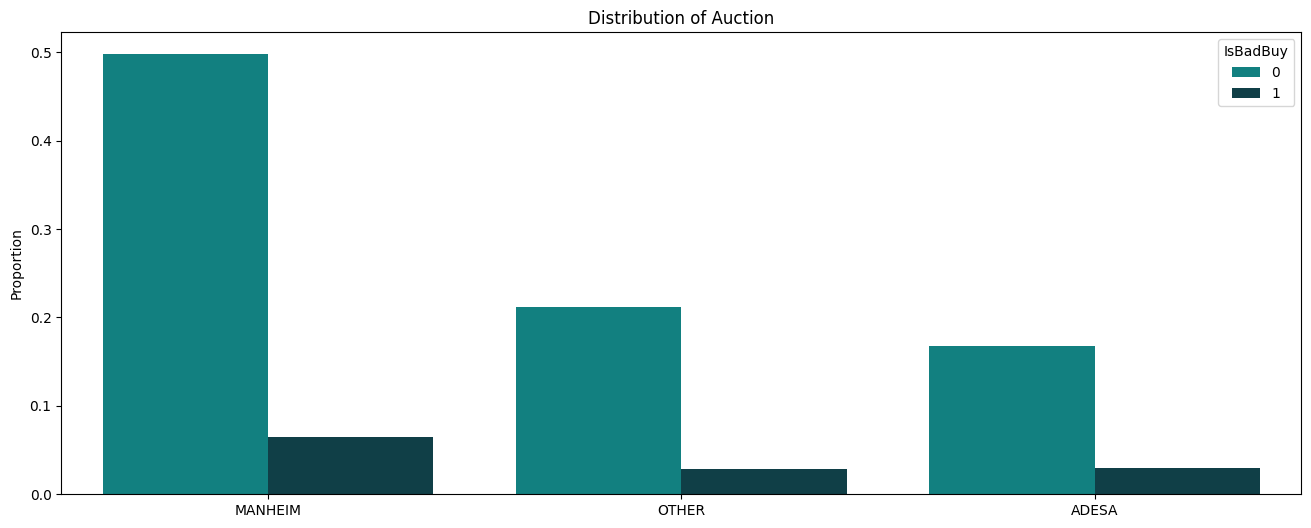

IsBadBuy          0     1
Transmission             
AUTO          61722  8676
MANUAL         2276   299
Manual            1     0
Missing           8     1


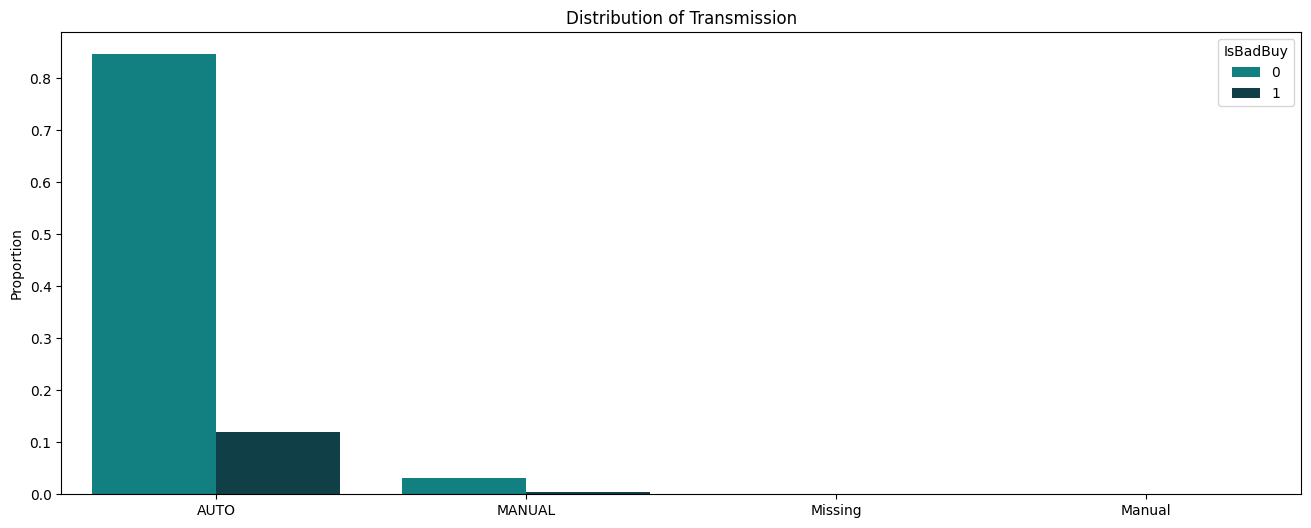

IsBadBuy         0     1
WheelTypeID             
0.0              4     1
1.0          32065  3985
2.0          30349  2655
3.0            656    99
Missing        933  2236


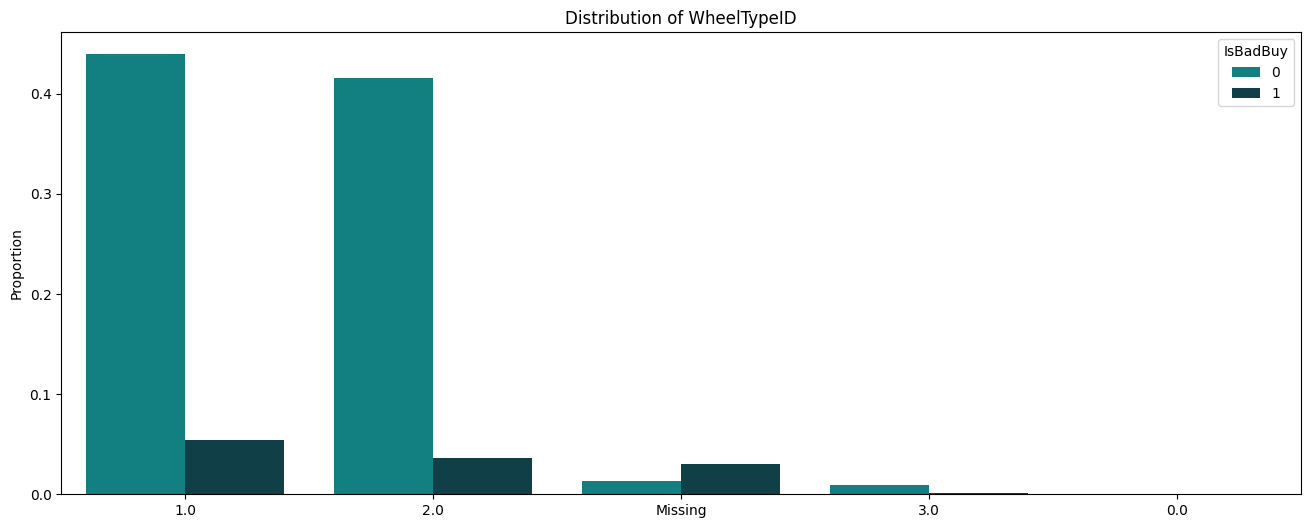

IsBadBuy       0     1
WheelType             
Alloy      32065  3985
Covers     30349  2655
Missing      937  2237
Special      656    99


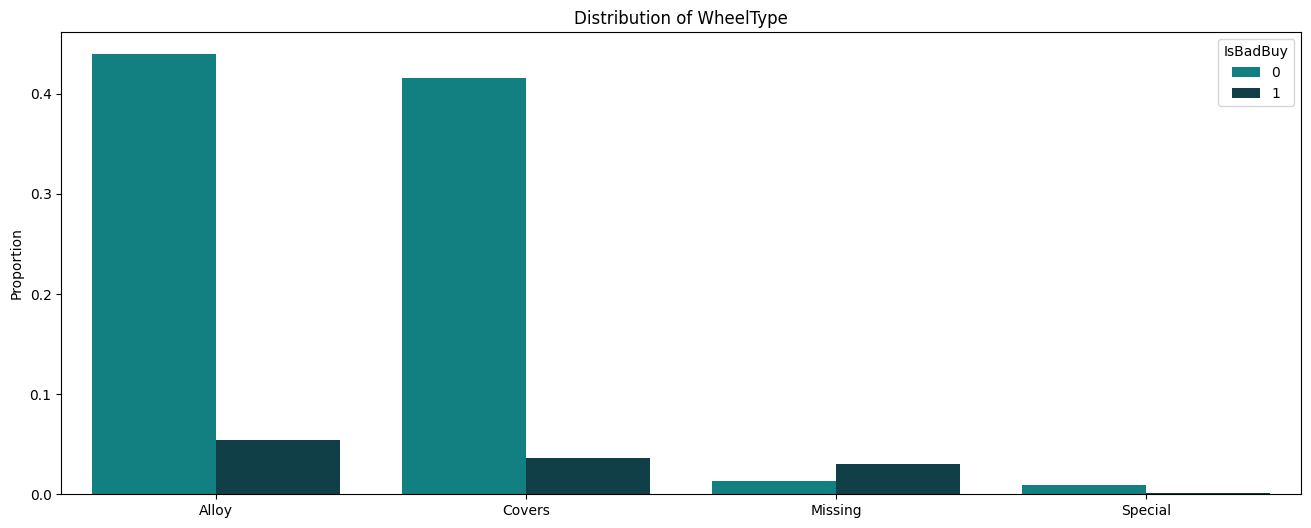

IsBadBuy            0     1
Nationality                
AMERICAN        53641  7387
Missing             5     0
OTHER             168    27
OTHER ASIAN      6972  1061
TOP LINE ASIAN   3221   501


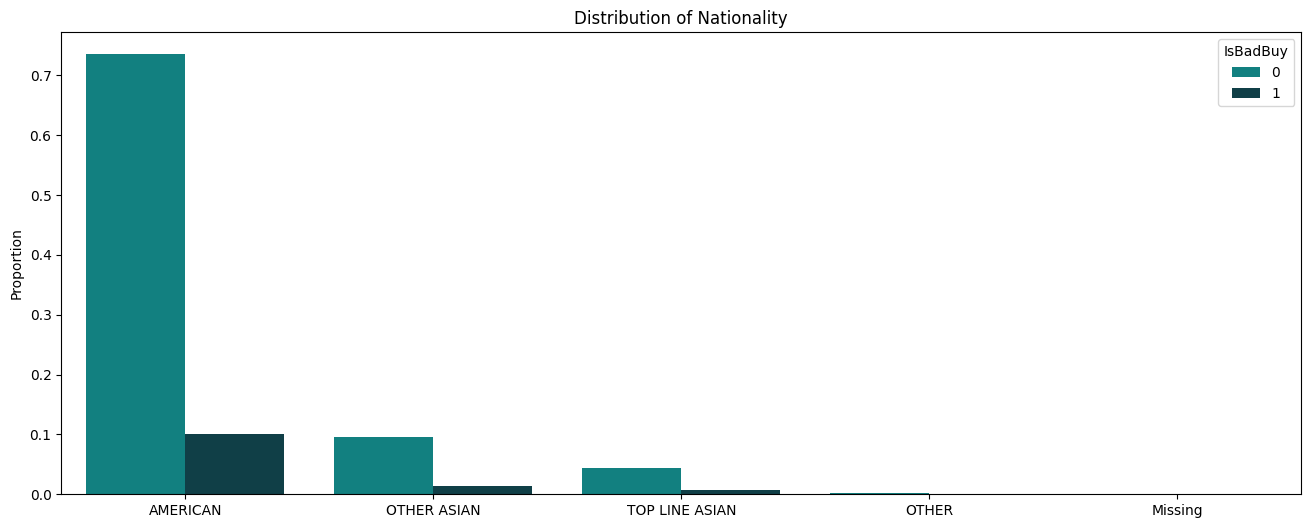

IsBadBuy                  0     1
TopThreeAmericanName             
CHRYSLER              20674  2725
FORD                  10389  1926
GM                    22578  2736
Missing                   5     0
OTHER                 10361  1589


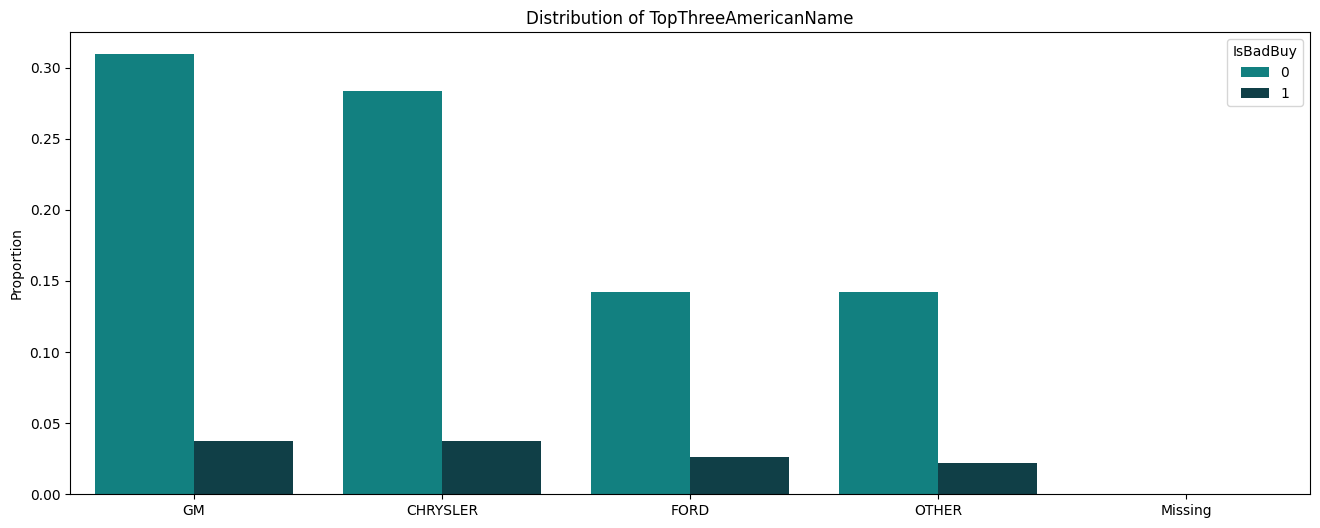

IsBadBuy       0     1
PRIMEUNIT             
Missing    60721  8843
NO          3230   127
YES           56     6


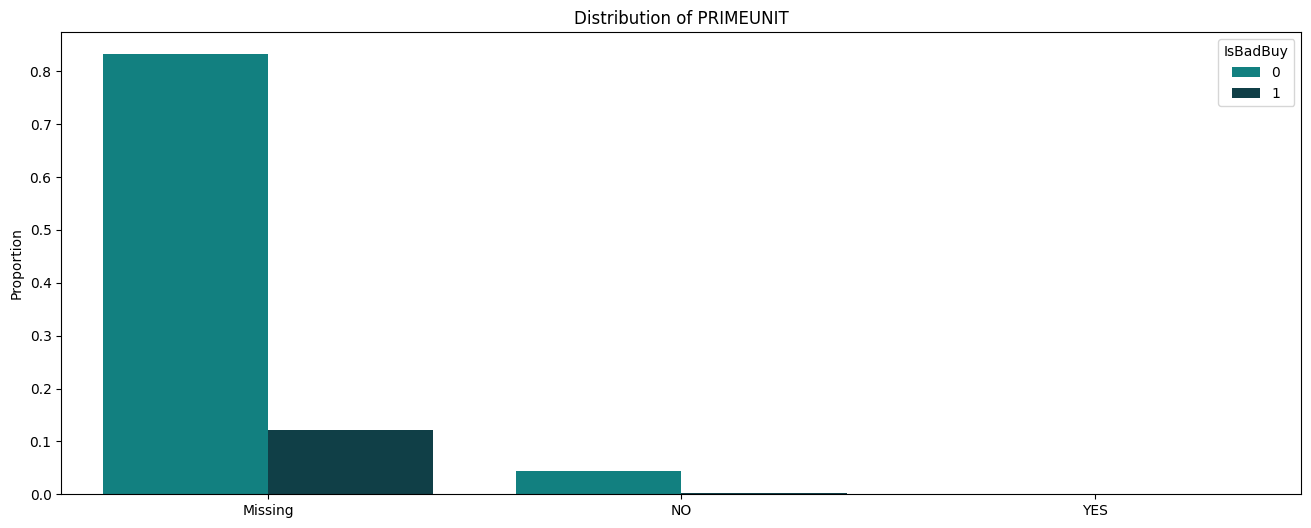

IsBadBuy      0     1
AUCGUART             
GREEN      3215   125
Missing   60721  8843
RED          71     8


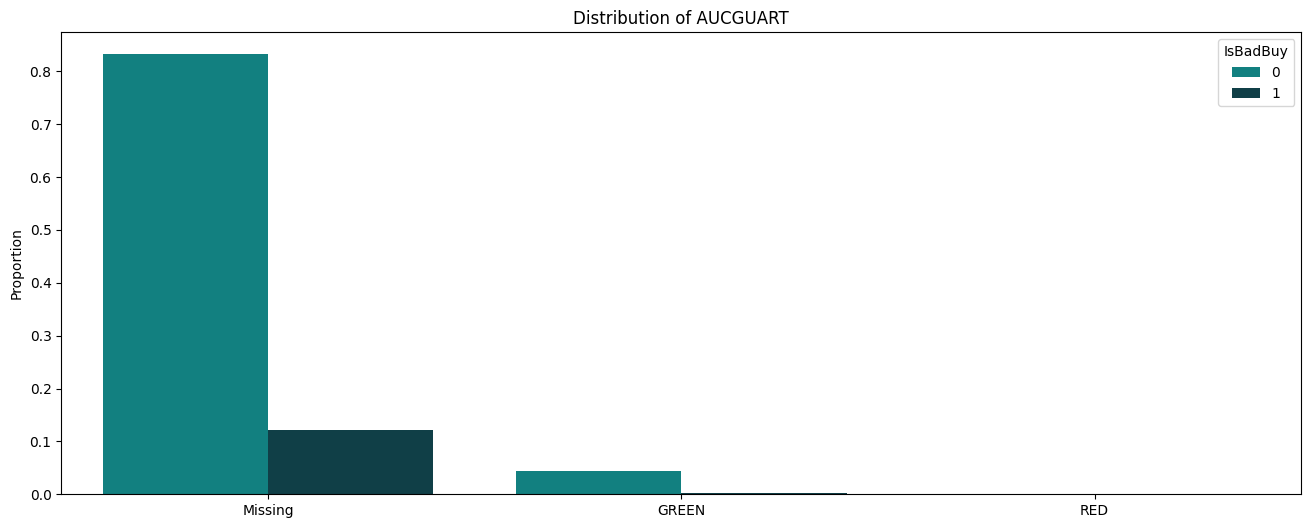

IsBadBuy          0     1
IsOnlineSale             
0             62375  8763
1              1632   213


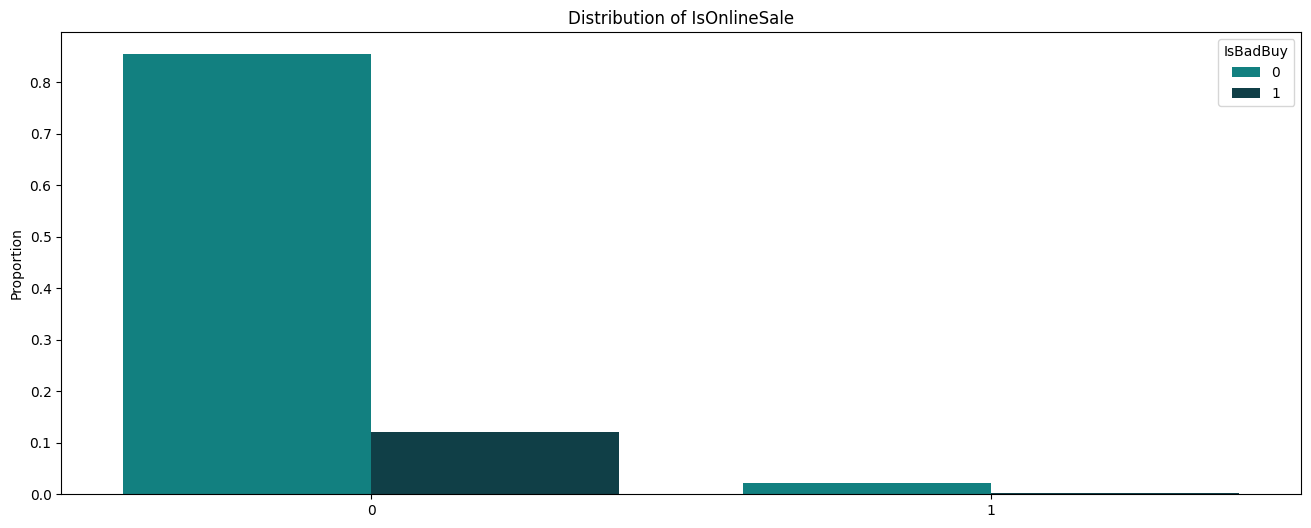

In [52]:
# Verteilung der kategorischen Features abhängig von der Zielvariable
categorical_features = ["Auction", "Transmission", "WheelTypeID", "WheelType", "Nationality", "TopThreeAmericanName", "PRIMEUNIT", "AUCGUART", "IsOnlineSale"]
for categorical_feature in categorical_features:
    # Füllen der fehlenden Werte mit "Missing"
    df_col = df_train[categorical_feature].fillna("Missing")
    
    # Kreuztabelle
    print(pd.crosstab(df_col, df_train["IsBadBuy"]))
    
    # Visualisierung
    plt.figure(figsize=(16, 6))
    palette = ["#009292", "#074650"]
    sns.countplot(x=df_col, data=df_train, hue="IsBadBuy", stat="proportion", order = df_col.value_counts().index, palette=palette)
    plt.title(f"Distribution of {categorical_feature}")
    plt.xlabel(None)
    plt.ylabel("Proportion")
    plt.show()

IsBadBuy       0     1
Make                  
CHEVROLET  15567  1681
CHRYSLER    7707  1137
DODGE      11579  1333
FORD        9563  1742
HYUNDAI     1578   233
JEEP        1390   254
KIA         2192   292
NISSAN      1752   333
Other       7071  1158
PONTIAC     3751   507
SATURN      1857   306


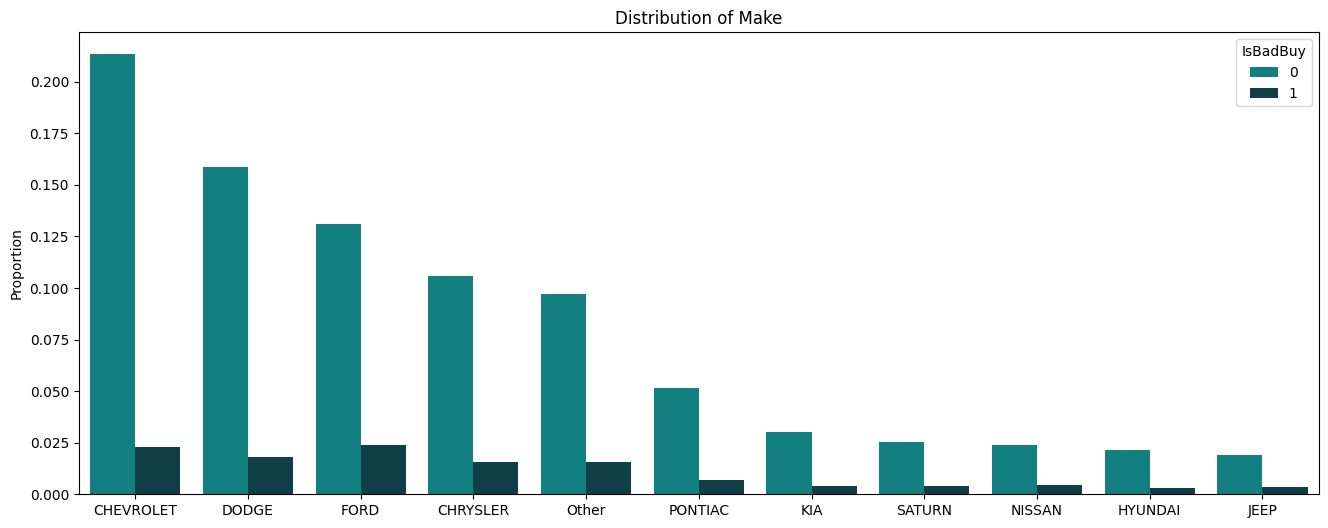

IsBadBuy      0     1
Color                
BEIGE      1373   211
BLACK      6769   858
BLUE       9158  1189
GOLD       4494   737
GREEN      2792   402
GREY       6976   911
MAROON     1786   260
Other      1578   234
RED        5432   825
SILVER    13032  1843
WHITE     10617  1506


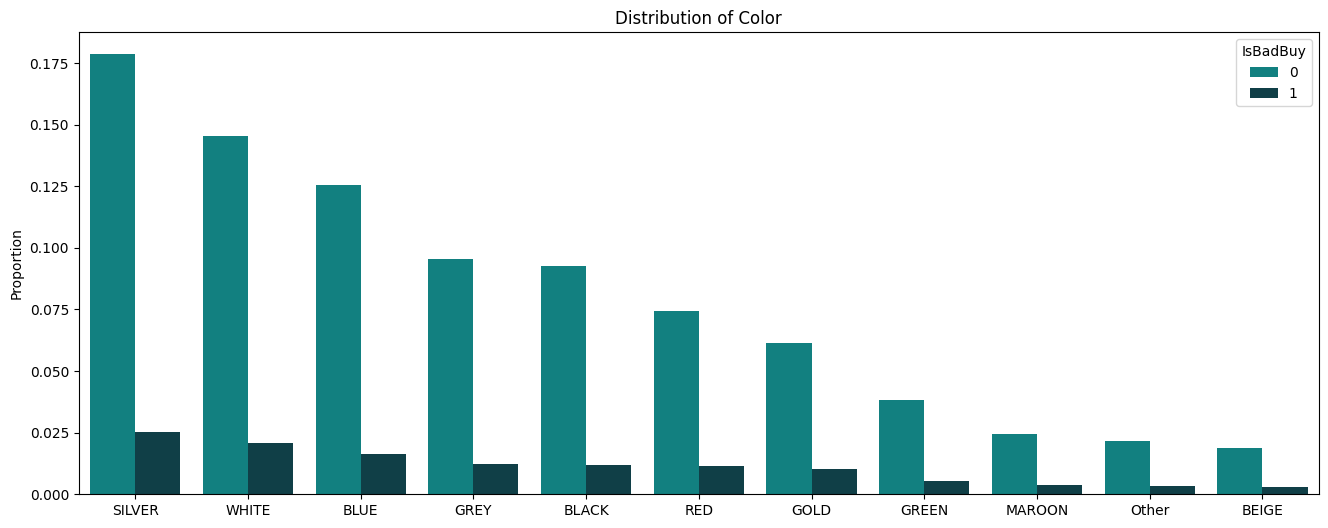

IsBadBuy         0     1
Size                    
COMPACT       6060  1145
CROSSOVER     1576   183
LARGE         8032   818
LARGE SUV     1201   232
LARGE TRUCK   2810   360
MEDIUM       27244  3541
MEDIUM SUV    6897  1193
Other         1377   269
SMALL SUV     1963   313
SPECIALTY     1739   176
VAN           5108   746


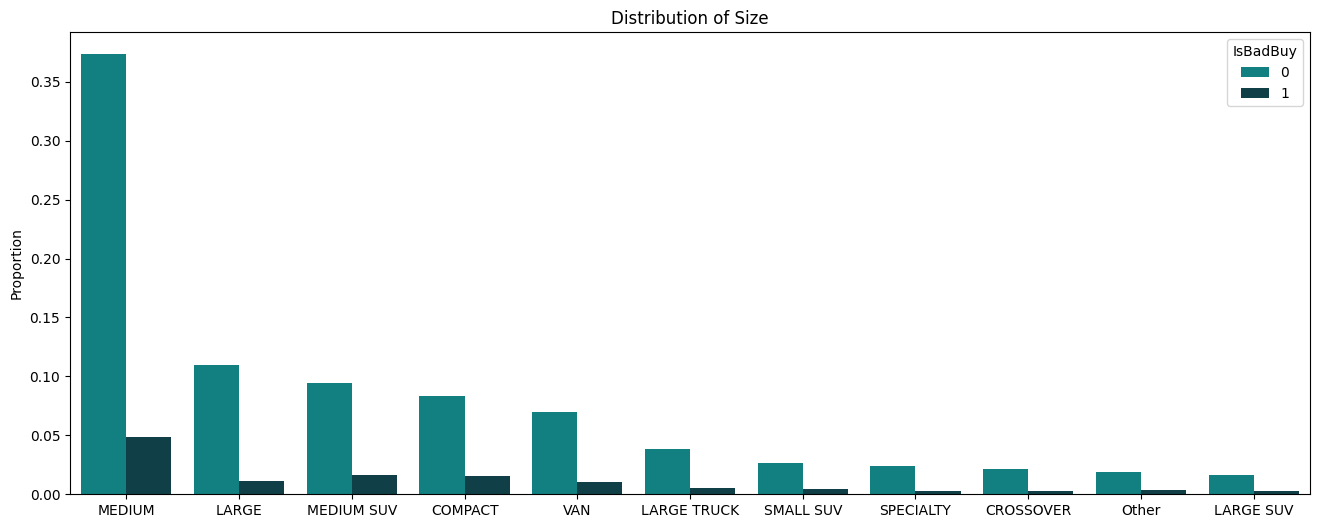

IsBadBuy      0     1
VNST                 
AZ         5470   704
CA         6144   951
CO         4394   604
FL         9305  1142
GA         2177   273
NC         6243   799
OK         3263   331
Other     10045  1498
SC         3686   594
TN         1561   203
TX        11719  1877


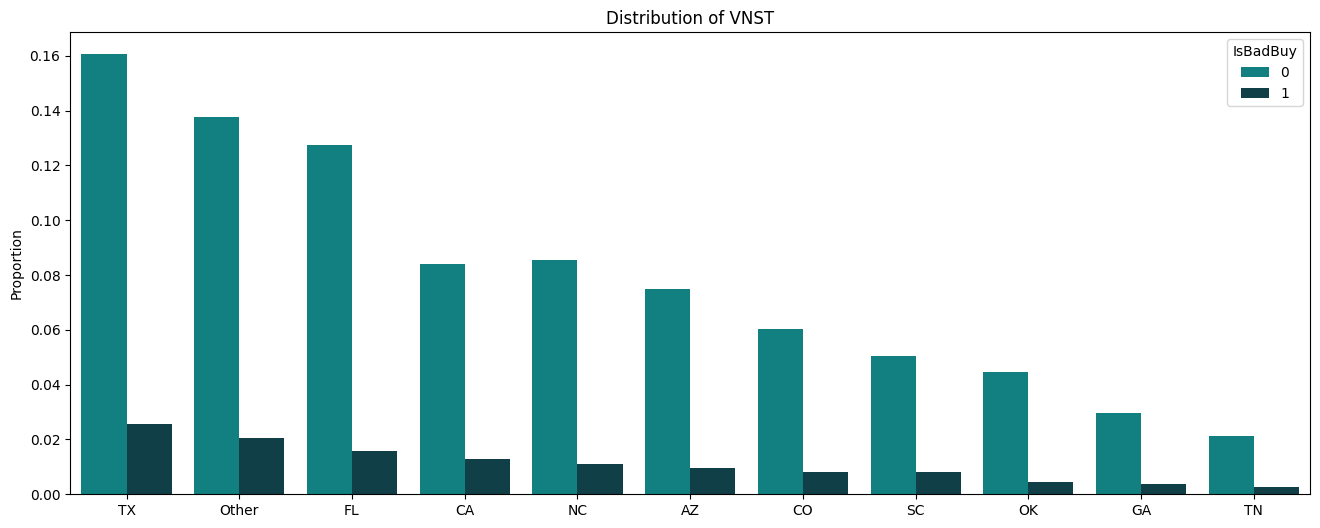

IsBadBuy                  0     1
Model                            
CALIBER                1232   143
CARAVAN GRAND FWD V6   1132   157
COBALT                  965   141
IMPALA                 1831   159
MALIBU 4C              1150    75
Other                 51527  7296
PT CRUISER             1893   436
PT CRUISER 2.4L I4 S    988   116
SEBRING 4C             1081    76
TAURUS                 1215   210
TAURUS 3.0L V6 EFI      993   167


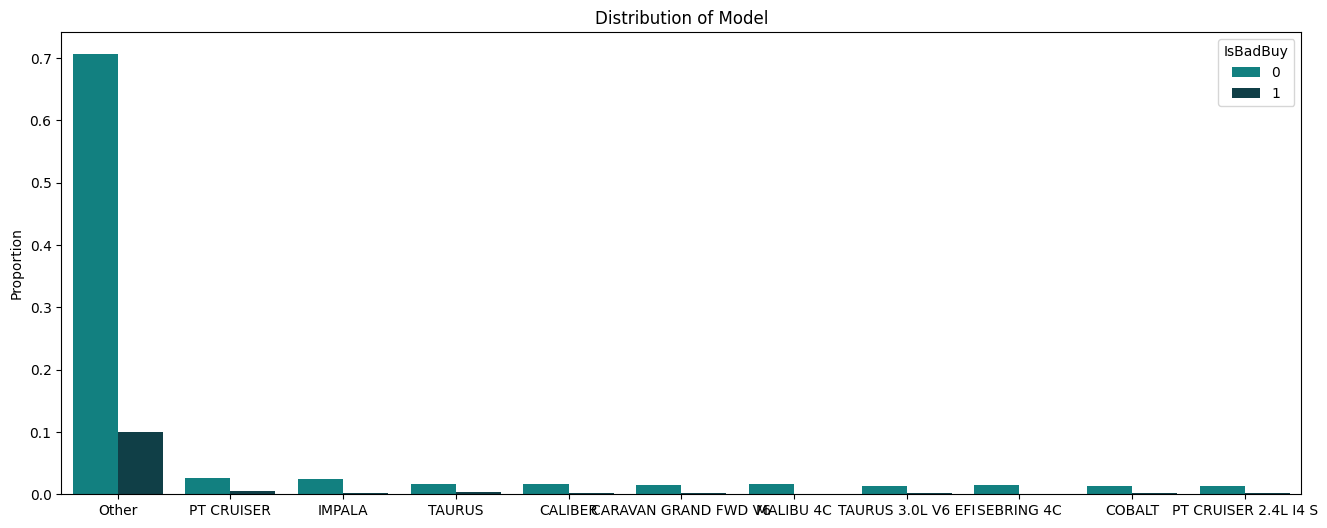

IsBadBuy      0     1
Trim                 
Bas       12223  1727
EX         1861   259
LS         9280   894
LT         3275   265
LX         2137   280
Missing    1986   374
Other     18416  3217
SE         8199  1149
SEL        1231   129
SXT        3447   378
Tou        1952   304


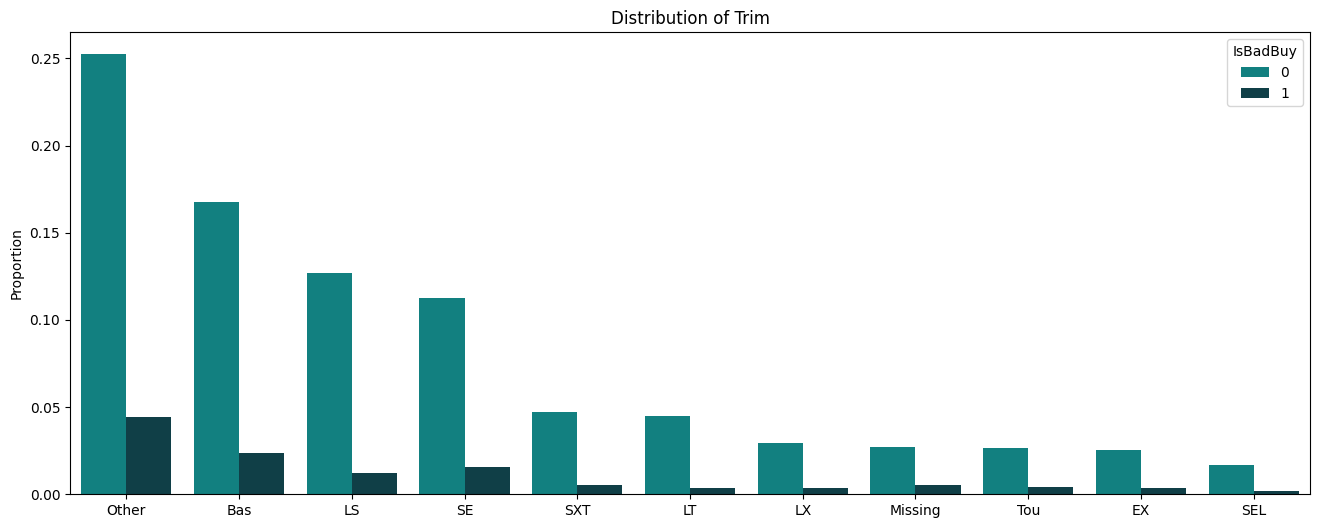

IsBadBuy              0     1
SubModel                     
2D COUPE            895   177
4D SEDAN          13373  1863
4D SEDAN LS        4353   365
4D SEDAN LT        1050    79
4D SEDAN LX         936   132
4D SEDAN SE        3344   515
4D SEDAN SXT FFV   1063    31
4D SUV 4.2L LS     1049   144
4D WAGON           2006   224
MINIVAN 3.3L       1133   125
Other             34805  5321


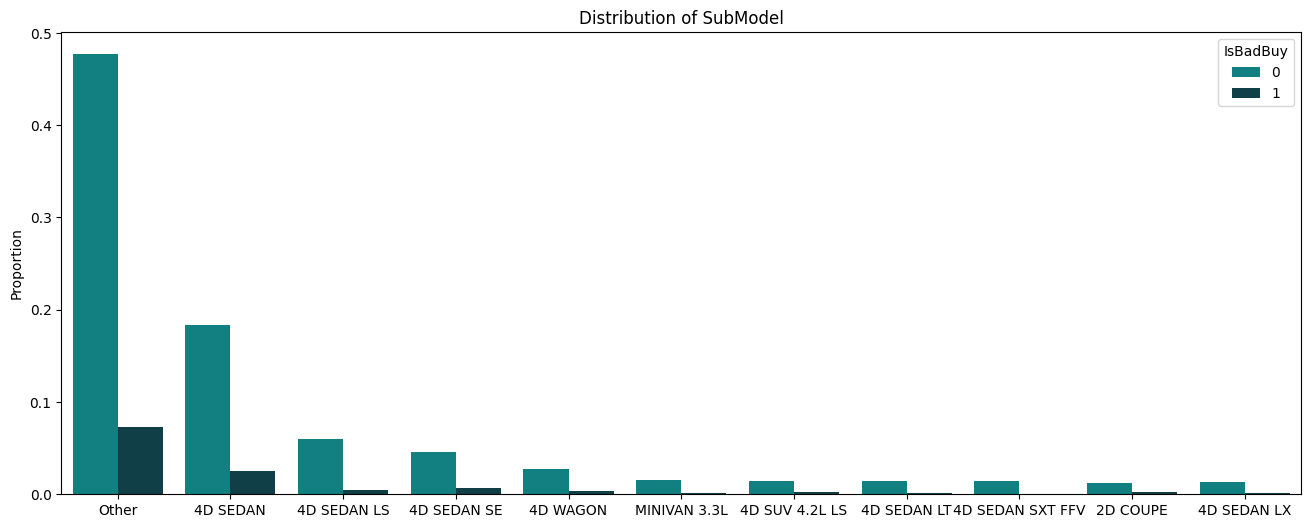

C:\Users\IAmBlindNotDeaf\AppData\Local\Temp\ipykernel_20900\2715826207.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_col = df_train[categorical_feature].astype("object").fillna("Missing")


IsBadBuy      0     1
BYRNO                
835        2630   357
3453       2596   331
17675      2253   364
18880      3047   541
19619      2420   318
20928      2330   256
21053      2439   377
22916      2465   387
99750      2574    79
99761      3722   221
Other     37531  5745


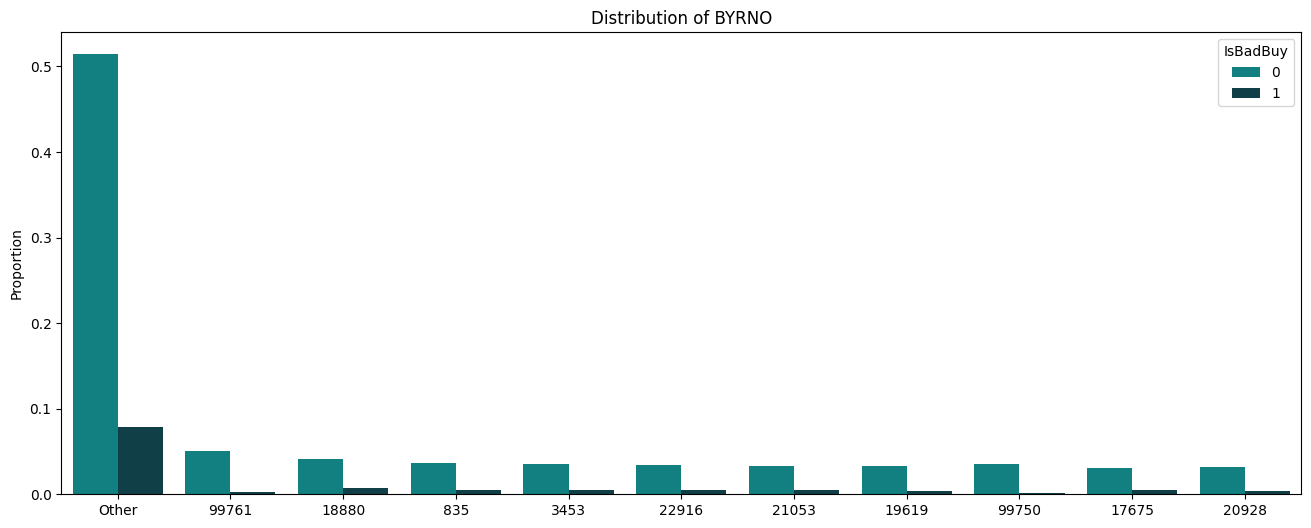

C:\Users\IAmBlindNotDeaf\AppData\Local\Temp\ipykernel_20900\2715826207.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_col = df_train[categorical_feature].astype("object").fillna("Missing")


IsBadBuy      0     1
VNZIP1               
27542      3072   330
28273      1606   281
29697      1679   320
32824      3352   347
74135      2182   139
75236      2095   336
80022      1864   254
85040      1829   183
85226      1777   309
95673      1758   212
Other     42793  6265


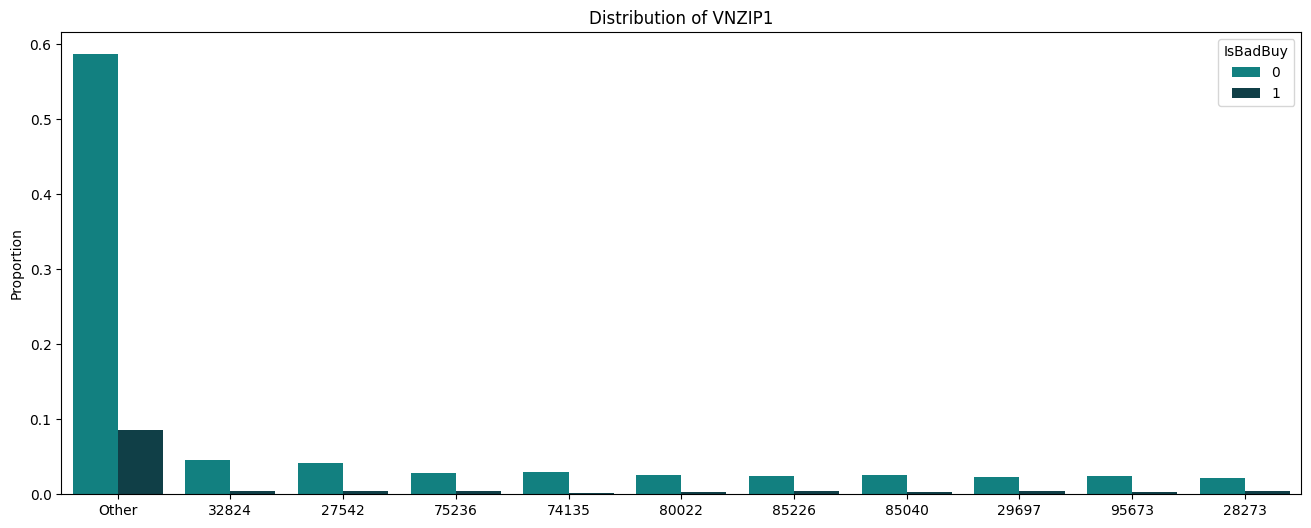

In [59]:
# Verteilung der hochkardinalen kategorischen Features abhängig von der Zielvariable
# Fokus auf einige zentrale Merkmale für das Portfolio
high_cardinality_categorical_features = ["Make", "Color", "Size", "VNST", "Model", "Trim", "SubModel", "BYRNO", "VNZIP1"]
top_n = 10

for categorical_feature in high_cardinality_categorical_features:
    # Füllen der fehlenden Werte mit "Missing" und Cast zu String nur für diese Analyse
    df_col = df_train[categorical_feature].astype("object").fillna("Missing")

    # Top-N-Kategorien behalten, Rest als "Other" zusammenfassen
    top_n_categories = df_col.value_counts().head(top_n).index
    df_col = df_col.where(df_col.isin(top_n_categories), other="Other")

    # Kreuztabelle
    print(pd.crosstab(df_col, df_train["IsBadBuy"]))
    
    # Visualisierung
    plt.figure(figsize=(16, 6))
    palette = ["#009292", "#074650"]
    sns.countplot(
        x=df_col,
        data=df_train,
        hue="IsBadBuy",
        stat="proportion",
        order=df_col.value_counts().index,
        palette=palette,
    )
    plt.title(f"Distribution of {categorical_feature}")
    plt.xlabel(None)
    plt.ylabel("Proportion")
    plt.show()

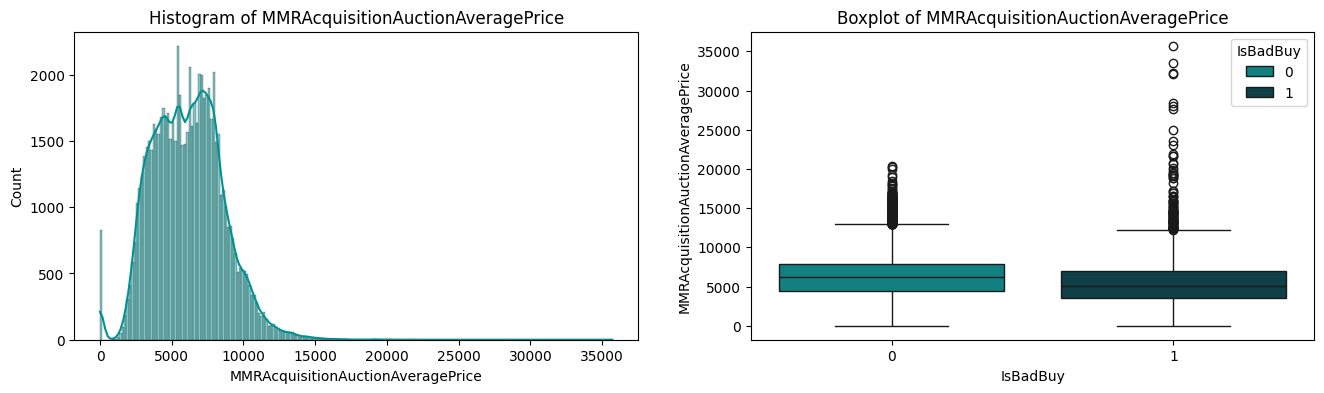

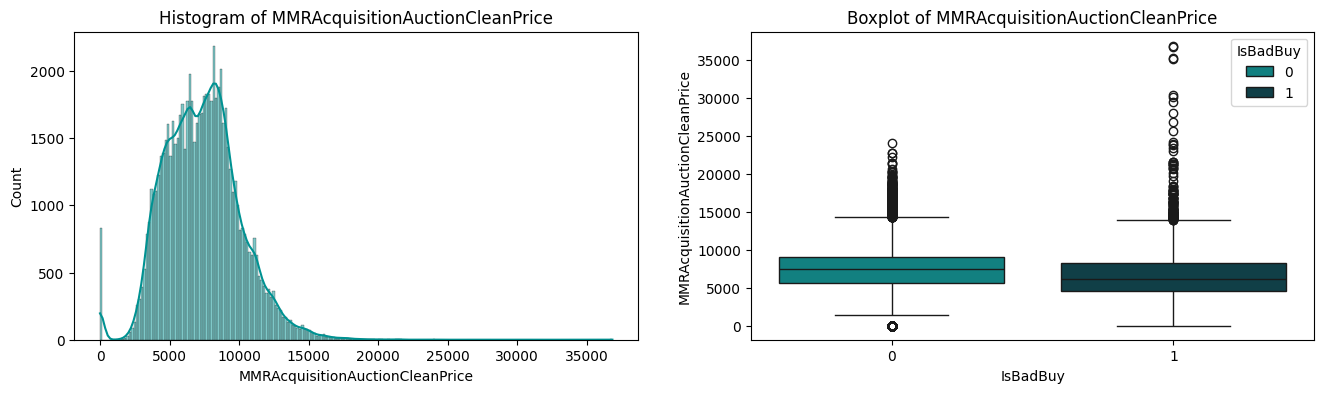

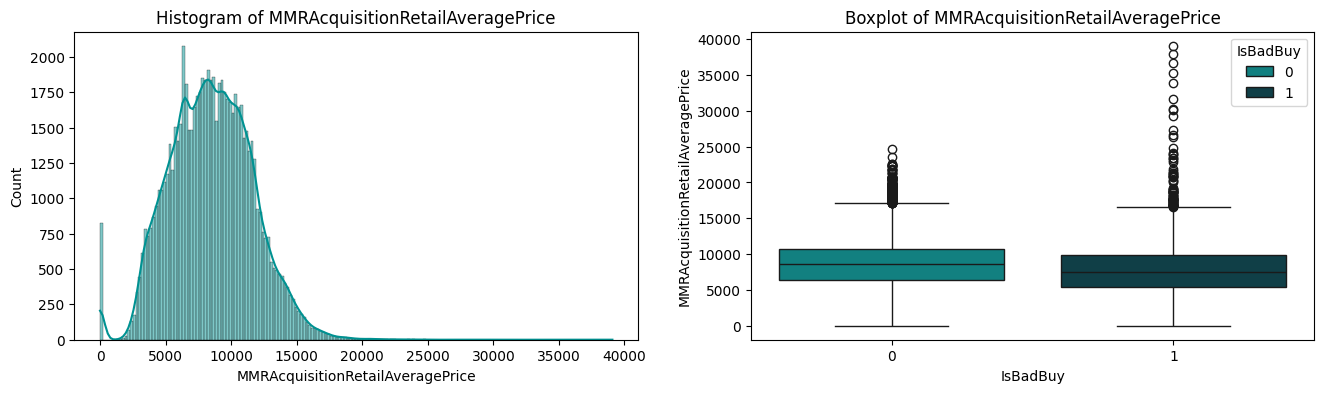

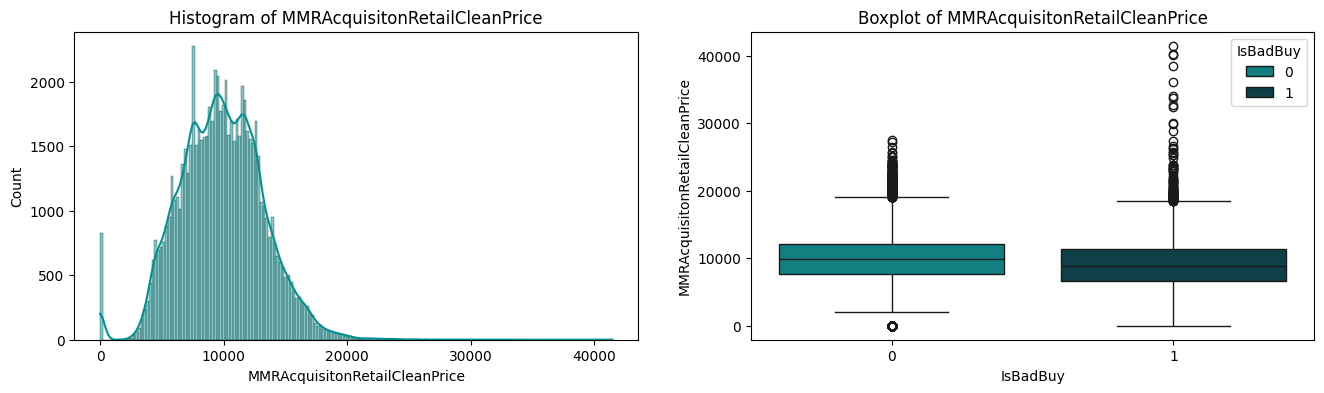

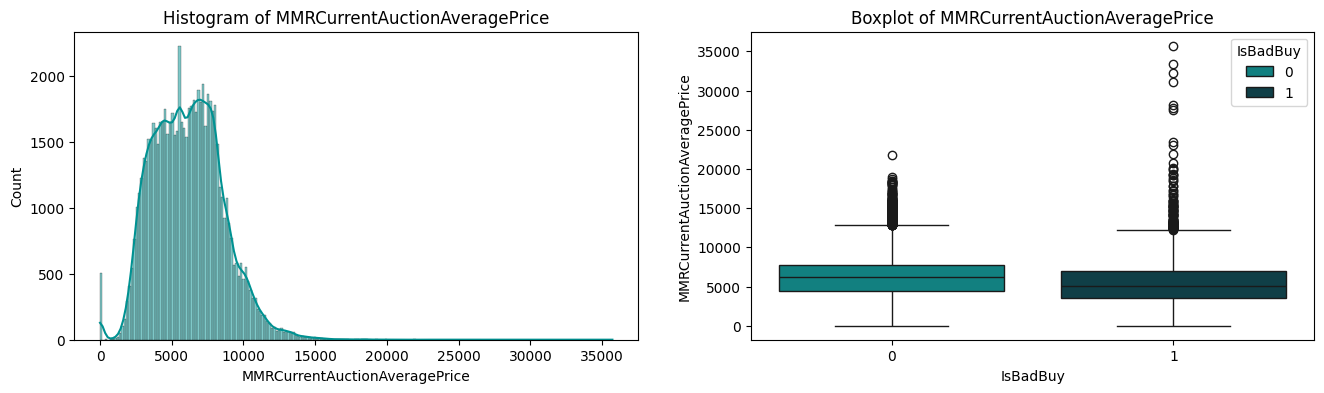

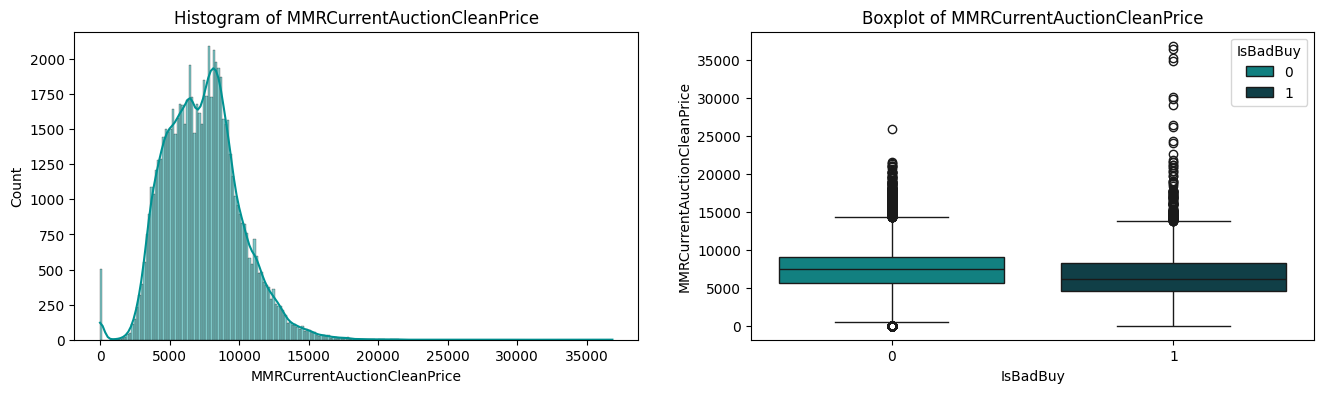

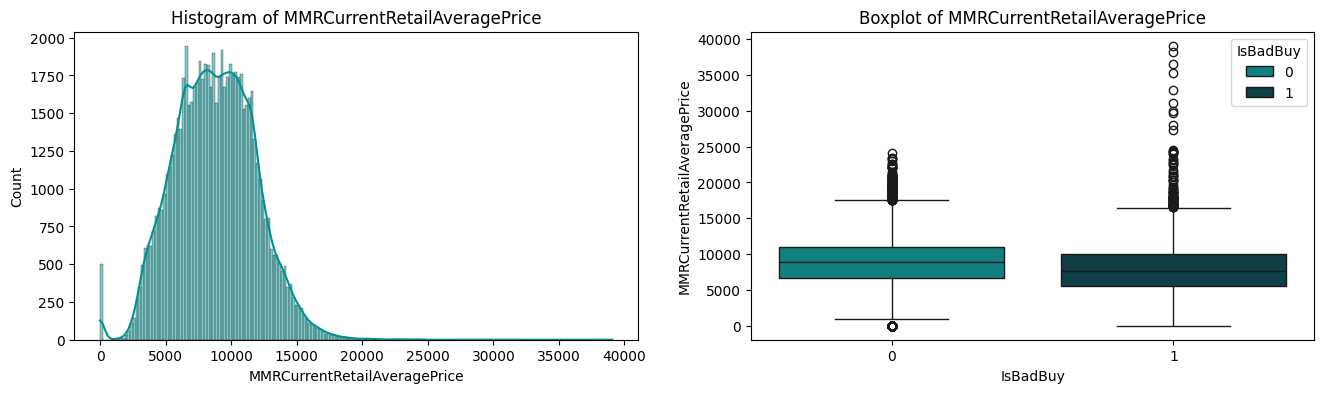

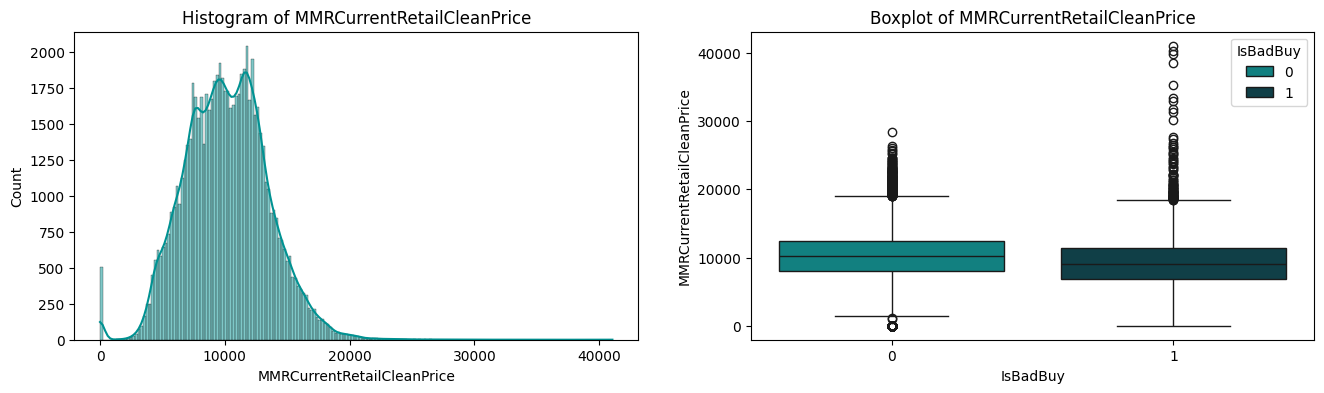

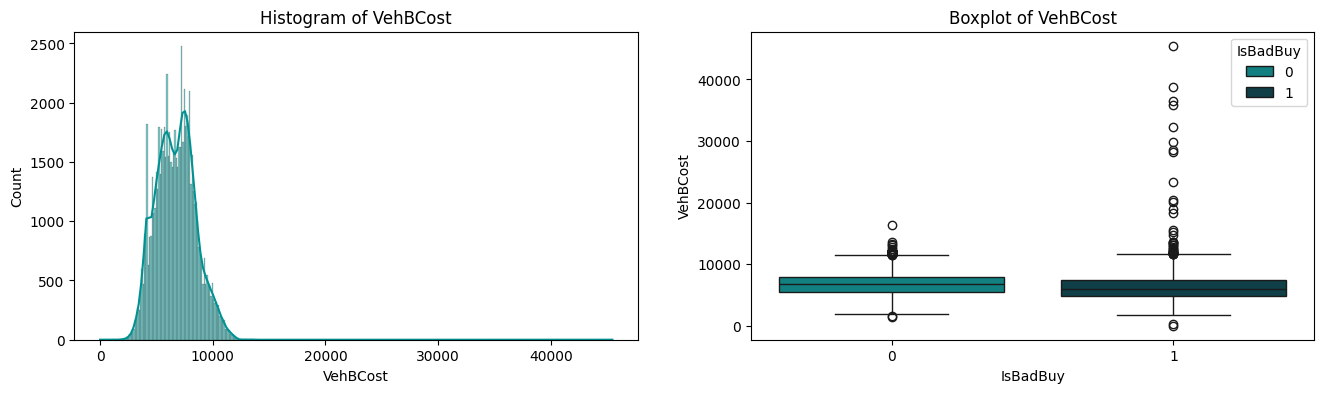

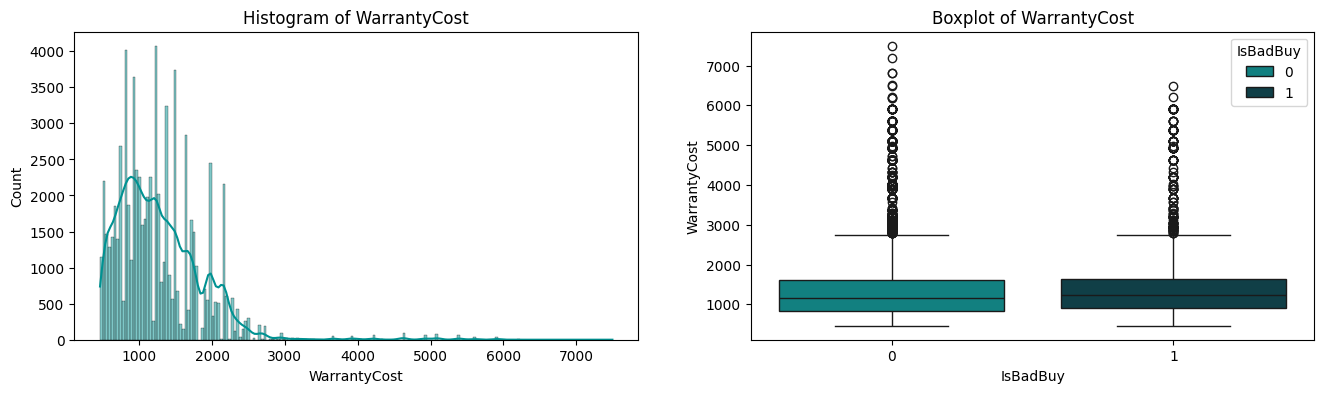

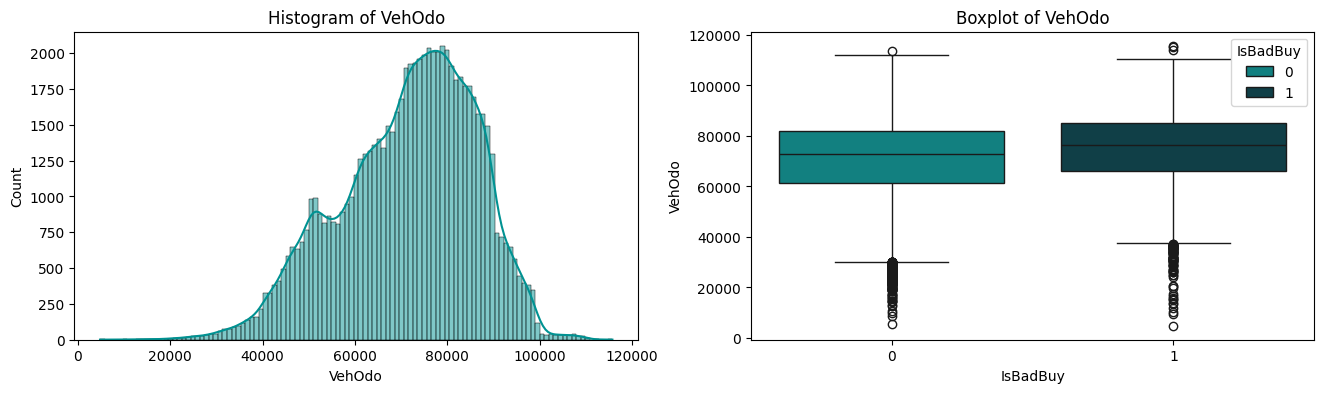

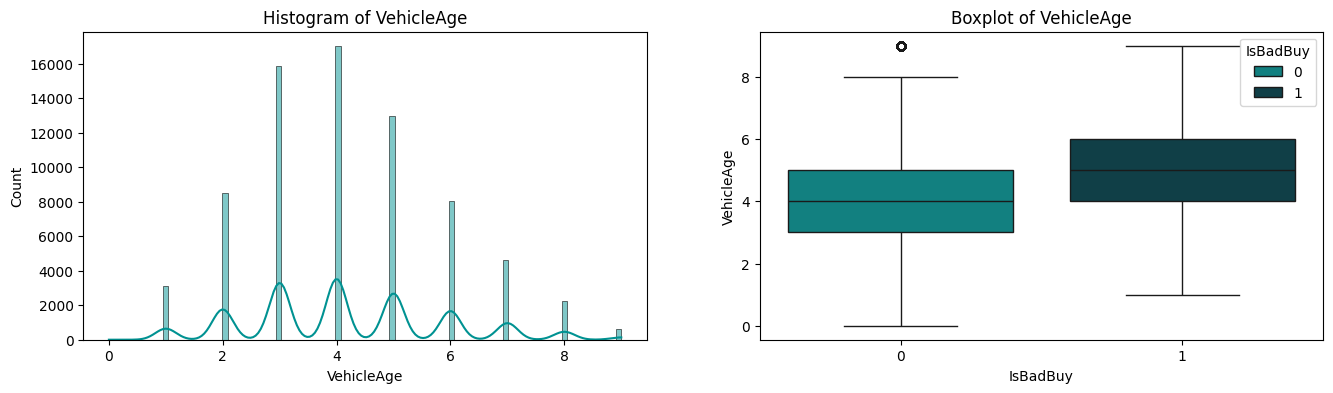

In [54]:
# Verteilung der numerischen Features abhängig von der Zielvariable
numerical_features = [  'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice', 
                        'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                        'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost', "VehOdo", "VehicleAge", "IsBadBuy"]
for numerical_feature in numerical_features[:-1]:
    # Visualisierung
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    palette = ["#009292", "#074650"]
    sns.histplot(x=df_train[numerical_feature], kde=True, ax=axes[0], color=palette[0])
    sns.boxplot(data=df_train, x="IsBadBuy", y=numerical_feature, hue="IsBadBuy", ax=axes[1], palette=palette)
    axes[0].set_title(f"Histogram of {numerical_feature}")
    axes[1].set_title(f"Boxplot of {numerical_feature}")
    plt.show()

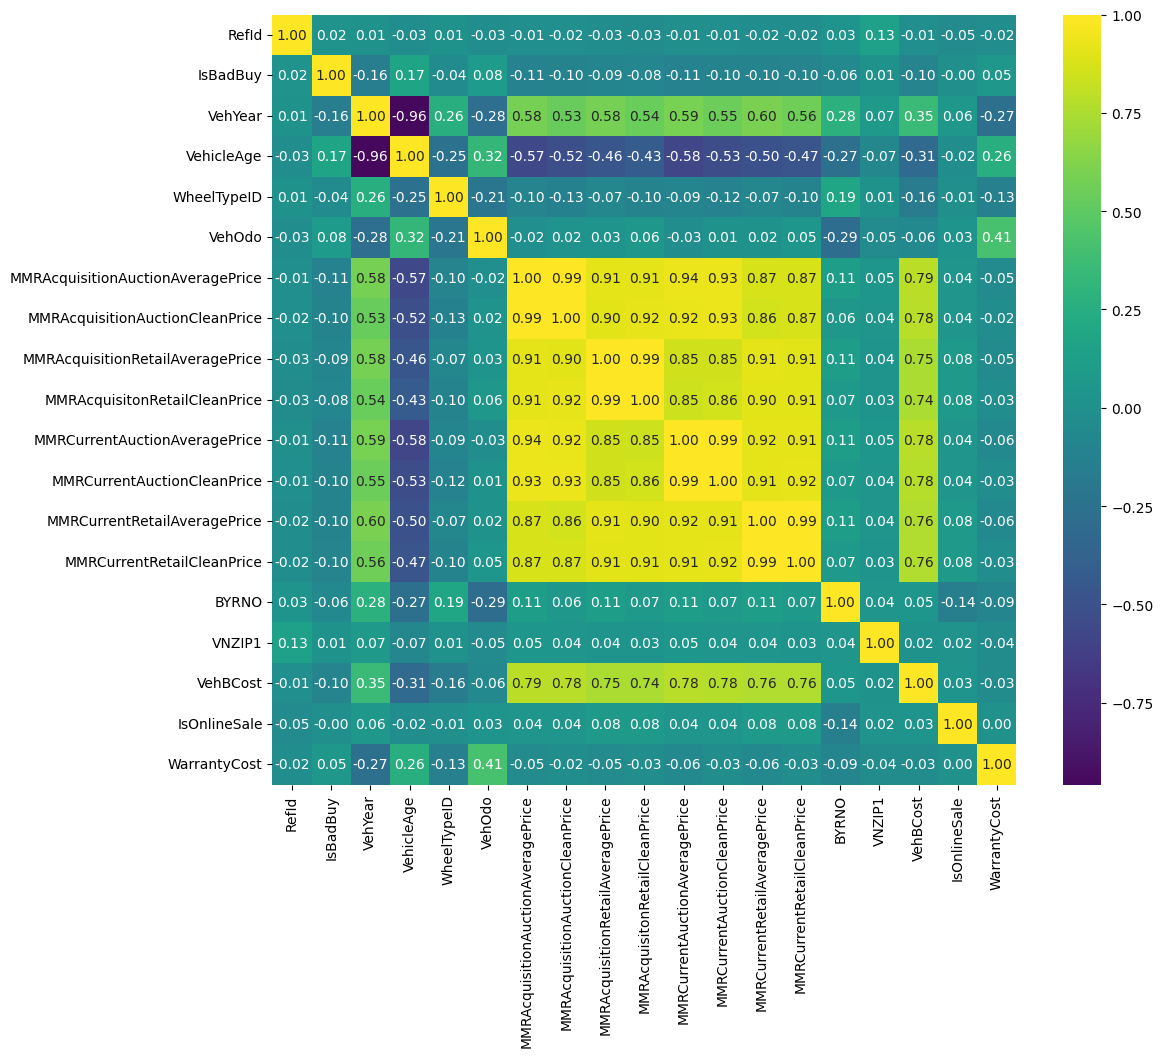

In [62]:
# Korrelationen zwischen numerischen Features
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="viridis", center=0, fmt=".2f");

In [56]:
# Verteilung des Datensets
print(df_train["IsBadBuy"].value_counts(normalize=True))

IsBadBuy
0    0.877012
1    0.122988
Name: proportion, dtype: float64


In [57]:
# Speichern des Dataframes
destination_path = "../data/processed"
df_train.to_csv(f"{destination_path}/eda_data.csv", index=False)